# K modes kprototypes

In [91]:
# !pip install --user mca

* https://pypi.org/project/mca/
* https://github.com/esafak/mca/blob/master/docs/usage.rst

In [1]:
import pandas as pd
import numpy as np
# !pip install kmodes
# import kmodes as km


In [2]:
# !pip install --upgrade kmodes

In [3]:
rowdata = pd.read_csv('../data/Wayfair-Babson_HackathonData 2019.csv')

In [5]:
data.head()

,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased
0,7/1/2017,2014237601010030,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,100to250k,0,0,1,0,0,0,0,0
1,7/1/2017,2909699474086000,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,NaN,1,0,9,0,230,0,0,0
2,7/1/2017,2987400996435030,New Visitor,Web,WebSearch,Chrome,Windows,NaN,NaN,NaN,0,0,28,0,10412,0,0,0
3,7/1/2017,6875972920873110,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,100to250k,1,1,8,1,430,0,0,0
4,7/1/2017,11534913004844900,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,NaN,1,1,9,0,1158,0,0,0


In [160]:
# data.shape

In [6]:
# data = data.drop('VisitDate',axis=1)
# data = data.drop('UniqueVisitID',axis=1)
data = data.drop(['VisitDate','UniqueVisitID','IncomeRange','Gender','State'],axis=1)
# data = data.drop('ClickedBanner',axis=1)

In [10]:
data = data.reset_index()

In [7]:
data = data.dropna(how= 'any',axis=0)

In [8]:
data = data.query('VisitorGroup != "New Visitor"')

In [11]:
%%time
data['b_effective'] = 0
for i in range(len(data.index)):
    
    if data['ClickedBanner'][i] == 1 and (data['AddedToBasket'][i]==1 or data['Purchased'][i]==1):
        data['b_effective'][i]=1

/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


CPU times: user 3min 45s, sys: 1.04 s, total: 3min 46s
Wall time: 3min 48s


In [110]:
# data['VisitorGroup']=data['VisitorGroup'].astype(str)
# data['PlatformUsed']=data['PlatformUsed'].astype(str)
# data['VisitSource']=data['VisitSource'].astype(str)
# data['BrowserName']=data['BrowserName'].astype(str)
# data['OSName']=data['OSName'].astype(str)
# data['State']=data['State'].astype(str)
# data['Gender']=data['Gender'].astype(str)

# Feature scaling

In [12]:
from  sklearn.preprocessing import MinMaxScaler

In [13]:
# data = data.reset_index()
list = ['ViewedProductInVisit','ViewedSaleInVisit', 'TotalPageViews', 'PlacedSearch', 'SecondsOnSite',
        'b_effective']
data[list] = MinMaxScaler().fit_transform(data[list])

In [17]:
data = data.drop('index',axis=1)
data.head()

,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,b_effective
0,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,0.0,0.0,0.000000,0.0,0.000000,0,0,0,0.0
1,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,1.0,1.0,0.005757,1.0,0.004948,0,0,0,0.0
2,Prior Visitor with Purchase,Phone,ThirdPartyAds,Safari,iOS,0.0,0.0,0.001645,1.0,0.000345,0,0,0,0.0
3,Prior Visitor with Purchase,Phone,ThirdPartyAds,Safari,iOS,1.0,0.0,0.016447,1.0,0.014845,0,1,0,0.0
4,Prior Visitor with Purchase,Phone,WebSearch,Safari,iOS,0.0,0.0,0.002467,0.0,0.001565,0,0,0,0.0


,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,b_effective
count,374691.000000,374691.000000,374691.000000,374691.000000,374691.000000,374691.000000
mean,0.627592,0.181846,0.014532,0.451983,0.024795,0.014802
std,0.483447,0.385718,0.023662,0.497690,0.046327,0.120758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.002467,0.000000,0.000967,0.000000
50%,1.000000,0.000000,0.006579,0.000000,0.005397,0.000000
75%,1.000000,0.000000,0.017270,1.000000,0.024351,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# K modes clustering

In [14]:
from kmodes.kprototypes import KPrototypes,k_prototypes
# from sklearn.utils.testing import assert_false
# from sklearn.utils.testing import assert_greater
# from sklearn.utils.testing import _named_check

# from sklearn.utils.estimator_checks import (
#     _yield_all_checks,
#     check_parameters_default_constructible)

# all_estimators = lambda: (('kmodes', KModes), ('kprototypes', KPrototypes))


 ## **n_clusters = 2**

In [33]:
# data = data.drop([''])

In [18]:
%%time
data1 = data.copy()
km2 = KPrototypes(n_clusters=2, max_iter=3000, init= 'Cao')
clusters2 = km2.fit_predict(data1.values,categorical =[0,1,2,3,4])
data1['cluster'] = clusters2

CPU times: user 12min 30s, sys: 8.98 s, total: 12min 39s
Wall time: 13min 6s


In [37]:
km2.cluster_centroids_

[array([[0.20807562, 0.07278962, 0.00561148, 0.1770044 , 0.0099997 ,
         0.00272127],
        [0.98491191, 0.27473375, 0.0221308 , 0.68619437, 0.0373962 ,
         0.02509081]]),
 array([['Prior Visitor with Purchase', 'Web', 'WebSearch', 'Safari',
         'iOS', 'eastern', 'Female', '100to250k'],
        ['Prior Visitor with Purchase', 'Phone', 'EmailFromWayfair',
         'Safari', 'iOS', 'eastern', 'Female', '50to100k']], dtype='<U27')]

In [20]:
data.query('b_effective == 1')

,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,b_effective
74,Prior Visitor with Purchase,Web,EmailFromWayfair,Safari,iOS,1.0,1.0,0.010691,1.0,0.007169,1,1,1,1.0
82,Prior Visitor with Purchase,Web,EmailFromWayfair,Chrome,Windows,1.0,1.0,0.023026,1.0,0.012877,1,1,0,1.0
119,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,1.0,1.0,0.014803,0.0,0.006237,1,1,0,1.0
181,Prior Visitor with Purchase,Phone,EmailFromWayfair,Chrome,Android,1.0,1.0,0.018914,0.0,0.008343,1,1,0,1.0
186,Prior Visitor with Purchase,Web,EmailFromWayfair,Chrome,Windows,1.0,1.0,0.060855,1.0,0.029932,1,1,0,1.0
342,Prior Visitor with Purchase,Web,WebSearch,Safari,Mac OS X,1.0,1.0,0.037829,0.0,0.113653,1,1,1,1.0
383,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,1.0,1.0,0.009868,0.0,0.002624,1,1,0,1.0
645,Prior Visitor with Purchase,Phone,EmailFromWayfair,Chrome,Android,1.0,1.0,0.094572,1.0,0.055296,1,1,0,1.0
758,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,1.0,0.0,0.023026,1.0,0.042879,1,1,0,1.0
777,Prior Visitor with Purchase,Web,EmailFromWayfair,Chrome,Mac OS X,1.0,1.0,0.014803,0.0,0.035157,1,1,0,1.0


In [21]:
data1.to_csv('../data/data_XiuWen2.csv',index= False)

# Use the km2 to predict all data (null??)

In [36]:
rowdata1 = pd.read_csv('../data/Wayfair-Babson_HackathonData 2019.csv')

In [46]:
%%time
rowdata1 = rowdata1.reset_index()


rowdata1['b_effective'] = 0
for i in range(len(rowdata1.index)):
    
    if rowdata1['ClickedBanner'][i] == 1 and (rowdata1['AddedToBasket'][i]==1 or rowdata1['Purchased'][i]==1):
        rowdata1['b_effective'][i]=1
    

/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CPU times: user 11min 11s, sys: 5.43 s, total: 11min 17s
Wall time: 11min 36s


In [56]:
non_usa =  ['AB', 'ACT', 'BC', 'CLA', 'DON', 'DUB', 'MB', 'NAN', 'NB', 'NL', 'NS',
            'NSW', 'NT', 'NU', 'ON', 'PE', 'QC', 'QLD', 'SA', 'SK', 'TAS','VIC','WAT','YT']

Eastern =  ['AL','CT','DC','DE','FL','GA','IL','KY','MA','MD','ME',
        'MI','MS','NC','NH','NJ','NY','OH','PA','RI','SC','TN','VA','VT','WV']

West_Coast = ['WA','OR','CA']

Mid_West = ['AR','CO','IA','ID','IN','KS','LA','MN','MO','MT','ND','NE','NV','OK','SD','UT','WI','WY']

South_West = ['AZ','NM','TX']
Other =  ['AK','HI','PR','VI']

rowdata1['State'] = rowdata1.State.apply(lambda x:'eastern' if x in Eastern else x)
rowdata1['State'] = rowdata1.State.apply(lambda x:'west_coast' if x in West_Coast else x)
rowdata1['State']  = rowdata1.State.apply(lambda x:'mid_west' if x in Mid_West else x)
rowdata1['State'] = rowdata1.State.apply(lambda x:'south_west' if x in South_West else x)
rowdata1['State'] = rowdata1.State.apply(lambda x:'other_usa' if x in Other else x)
rowdata1['State'] = rowdata1.State.apply(lambda x:'non_usa' if x in non_usa else x)

In [69]:
rowdata1.VisitorGroup.unique()


array(['Prior Visitor with Purchase', 'New Visitor', 'Prior Visitor'],
      dtype=object)

In [57]:
%%time
rowdata1['cluster'] = km2.predict(rowdata1[['VisitorGroup', 'PlatformUsed',
       'VisitSource', 'BrowserName', 'OSName', 'State', 'Gender',
       'IncomeRange', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite',
       'b_effective']].values,categorical =[0,1,2,3,4,5,6,7])

CPU times: user 38.5 s, sys: 748 ms, total: 39.3 s
Wall time: 39.2 s


In [70]:
rowdata1= rowdata1.query('VisitorGroup != "New Visitor"')

In [71]:
rowdata1.to_csv('../data/2cluster_alldata.csv')

In [72]:
rowdata1.shape

(755917, 22)

In [3]:
rowdata1 = pd.read_csv('../data/2cluster_alldata.csv')

In [10]:
rowdata2 = rowdata1.dropna(how = 'any', axis= 0)

In [5]:
rowdata2.shape

(374691, 23)

In [8]:
rowdata2.to_csv('../data/2cluster_data.csv',index = False)

In [16]:
data1.to_csv('../data/n_cluster2.csv',index  = False)

In [11]:
rowdata2.groupby('cluster').mean()

,Unnamed: 0,level_0,index,UniqueVisitID,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased,b_effective
cluster,,,,,,,,,,,,,
0,514745.802398,514745.802398,514745.802398,4.612664e+18,0.000162,0.009811,1.248132,0.014743,3.824558,0.013915,0.004194,0.000360,0.000054
1,494423.412145,494423.412145,494423.412145,4.606838e+18,0.736805,0.211791,21.704227,0.528091,2528.925212,0.062587,0.217641,0.073451,0.017369


In [15]:
data1.groupby('cluster').mean()

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,b_effective
cluster,,,,,,
0,0.208076,0.072790,0.005611,0.177004,0.010000,0.002721
1,0.984912,0.274734,0.022131,0.686194,0.037396,0.025091


In [17]:
# data1.groupby('cluster').mean()

In [18]:
# data1.groupby('cluster').mean()

### It seems like the 2 clusters seprated the customer by PlacedSearch, so I will try n_cluster =3 

 ## **n_clusters = 3**

In [19]:
data2 = data.copy()
km3 = KPrototypes(n_clusters=3, max_iter=3000, init= 'Cao')
clusters3 = km3.fit_predict(data2.values,categorical =[0,1,2,3,4,5,6,7])

In [20]:
km3.cluster_centroids_

[array([[0.41622058, 0.02210314, 0.00758495, 0.        , 0.01364981,
         0.00261847],
        [0.87945   , 1.        , 0.02600524, 0.48341735, 0.04205273,
         0.06626816],
        [0.77406417, 0.00184998, 0.01786763, 1.        , 0.03067555,
         0.00613528]]),
 array([['Prior Visitor with Purchase', 'Web', 'WebSearch', 'Safari',
         'iOS', 'eastern', 'Female', '100to250k'],
        ['Prior Visitor with Purchase', 'Phone', 'EmailFromWayfair',
         'Safari', 'iOS', 'eastern', 'Female', '50to100k'],
        ['Prior Visitor with Purchase', 'Web', 'WebSearch', 'Safari',
         'iOS', 'eastern', 'Female', '100to250k']], dtype='<U27')]

In [21]:
data2['cluster'] = clusters3

In [22]:
data2.groupby('cluster').mean()

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,b_effective
cluster,,,,,,
0,0.416221,0.022103,0.007585,0.000000,0.013650,0.002618
1,0.879450,1.000000,0.026005,0.483417,0.042053,0.066268
2,0.774064,0.001850,0.017868,1.000000,0.030676,0.006135


In [24]:
# data2.groupby('cluster').mean()

In [25]:
data2.to_csv('../data/n_cluster3.csv',index = False)

 ## **n_clusters = 4**

In [144]:
data3 = data.copy()
km4 = KPrototypes(n_clusters=4, max_iter=3000, init= 'Cao')
clusters4 = km4.fit_predict(data3.values,categorical =[0,1,2,3,4,5,6,7])
data3['cluster'] = clusters4

In [145]:
km4.cluster_centroids_

[array([[8.50059366e-01, 8.04941482e-01, 2.34859252e-02, 4.02612088e-01,
         3.69884058e-02, 1.00000000e+00, 3.20348278e-01],
        [1.00000000e+00, 0.00000000e+00, 1.93496194e-02, 5.98260200e-01,
         3.28016948e-02, 3.24956310e-03, 0.00000000e+00],
        [8.97764713e-01, 1.00000000e+00, 2.69279540e-02, 5.19521771e-01,
         4.36885086e-02, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.14735550e-02, 2.51503716e-03, 2.36508127e-01,
         5.34567333e-03, 2.06905325e-02, 5.23810949e-05]]),
 array([['Prior Visitor with Purchase', 'Web', 'EmailFromWayfair',
         'Safari', 'iOS', 'eastern', 'Female', '50to100k'],
        ['Prior Visitor with Purchase', 'Web', 'WebSearch', 'Safari',
         'iOS', 'eastern', 'Female', '100to250k'],
        ['Prior Visitor with Purchase', 'Phone', 'EmailFromWayfair',
         'Safari', 'iOS', 'eastern', 'Female', '50to100k'],
        ['Prior Visitor with Purchase', 'Web', 'WebSearch', 'Safari',
         'iOS', 'eastern', 

In [146]:
data3.groupby('cluster').mean()

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,b_effective
cluster,,,,,,,
0,0.850059,0.804941,0.023486,0.402612,0.036988,1.000000,0.320348
1,1.000000,0.000000,0.019350,0.598260,0.032802,0.003250,0.000000
2,0.897765,1.000000,0.026928,0.519522,0.043689,0.000000,0.000000
3,0.000000,0.031474,0.002515,0.236508,0.005346,0.020691,0.000052


In [147]:
data3.to_csv('../data/n_cluster4.csv',index = False)

In [154]:
data3.shape

(381111, 16)

# Heat Map

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

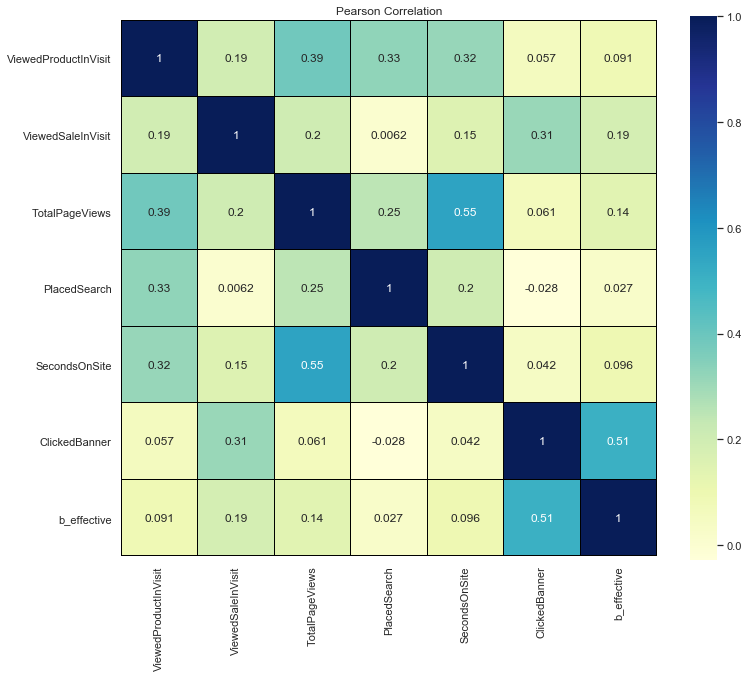

In [153]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation')
# Draw the heatmap using seaborn
sns.heatmap(data[list].astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

if some one click the banner then he has a 50% possibility to add to basket or purchase or add&purchase ? Is that conclusion correct? 